# Neural Networks
## ![sklearn](https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png)

In [10]:
# Imports
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from pprint import pprint

In [6]:
# Load data from https://www.openml.org/d/554
# This is the mnist data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.  # convert int to float

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [7]:
# Utility function to print actual image of mnist
# Takes in an array of 784x1
def print_image(image):
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

<IPython.core.display.Javascript object>

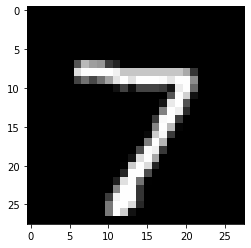

In [8]:
# Let's see what the images look like
print_image(X_test.to_numpy()[0])

In [11]:
# Here is how the computer actually represents it
pprint(X_test.to_numpy()[0])

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# Setup classifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

In [12]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
MLPClassifier?

In [43]:
# Train classifier
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355


/usr/local/anaconda3/envs/p8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=10,
              random_state=1, solver='sgd', verbose=10)

In [44]:
# this example won't converge because of CI's time constraints, so we catch the warning and are ignore it here

from sklearn.exceptions import ConvergenceWarning
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    mlp.fit(X_train, y_train)

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355


In [45]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.986800
Test set score: 0.970000


In [95]:
mlp.coefs_

[array([[-0.01405516,  0.03731949, -0.08467273, ..., -0.0349585 ,
         -0.03594751, -0.06266732],
        [-0.08141165,  0.03029191, -0.04884564, ...,  0.01248014,
         -0.08420591,  0.0198425 ],
        [-0.02936362,  0.00458322,  0.0653725 , ...,  0.03607697,
          0.01011511, -0.08256532],
        ...,
        [ 0.02848052, -0.07641292, -0.01940089, ..., -0.06692097,
         -0.0281908 , -0.05097943],
        [-0.05605756,  0.08426531, -0.07566693, ..., -0.03975366,
         -0.06697031,  0.08218818],
        [ 0.04899327,  0.04567228, -0.01877677, ...,  0.04117367,
         -0.00405521, -0.05411453]]),
 array([[-1.38186849e+00,  4.24161127e-01, -2.88652112e-01,
          4.29691288e-01,  6.00304216e-01,  4.17851157e-01,
         -1.28263194e+00, -3.73907194e-02,  5.45098612e-01,
          6.02127616e-01],
        [-8.75430122e-02,  4.41082202e-01, -8.27770773e-01,
         -1.35785254e+00,  6.00870436e-01,  1.98766830e-01,
         -3.19555836e-02, -1.13174398e-02, -9.

# ![TensorFlow](https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/330px-TensorFlowLogo.svg.png)


**TensorFlow is an end-to-end open source platform for machine learning.**  

- Originally from Google Brain team, with particular focus on training and inference of deep neural networks.
- Tensorflow is a symbolic math library based on dataflow and differentiable programming.
- Uses C++ libraries to exploit CPU vector math libraries
- Can leverage to NVIDIA CUDA library for high parallelization
- Supports Python, JavaScript, C++, Java, Go, Swift (Early Release)

Generally, it can think of as a programming system in which you represent computations as graphs. 
- Nodes in the graph represent math operations
- Edges represent multidimensional data arrays (tensors) communicated between them

**Great Tutorial**  
https://data-flair.training/blogs/tensorflow-tutorial/

In [46]:
!pip install tensorflow 
!pip install tensorflow-gpu

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu
ERROR: No matching distribution found for tensorflow-gpu


As of right now, need python < 3.8?  

https://www.tensorflow.org/tutorials/quickstart/beginner  

In [13]:
# imports
import tensorflow as tf

### Keras
Keras is an API designed for human beings, not machines. Keras follows best practices for reducing cognitive load: it offers consistent & simple APIs, it minimizes the number of user actions required for common use cases, and it provides clear & actionable error messages. It also has extensive documentation and developer guides. 

In [14]:
# load mnist data from tensorflow
mnist = tf.keras.datasets.mnist

In [15]:
# split into train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# convert samples from integers to floating-point
x_train, x_test = x_train / 255.0, x_test / 255.0

In [16]:
# this time its 28x28 arrays
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<IPython.core.display.Javascript object>

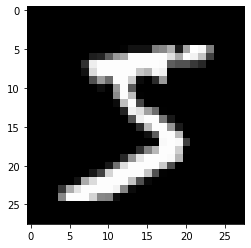

In [17]:
# Renders like this
print_image(x_train[0])

In [18]:
# start making model
model = tf.keras.Sequential()

In [19]:
# First layer will flatten input to one dimensional array
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.output_shape

(None, 784)

In [20]:
# Add a layer with 128 neurons and activation function relu
# this will be our hidden layer
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.output_shape

(None, 128)

In [21]:
# Add dropout rate to randomly switch to 1 to avoid overfitting to training set
model.add(tf.keras.layers.Dropout(0.2))
model.output_shape

(None, 128)

In [22]:
# add final output layer
model.add(tf.keras.layers.Dense(10))
model.output_shape

(None, 10)

In [23]:
# or it can be all at once
# build the tf.keras.Sequential model by stacking layers. Choose an optimizer and loss function for training
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [24]:
# For each example the model returns a vector of "logits" or "log-odds" scores, one for each class.
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.61939657,  0.27974933, -0.41479334, -0.13407737,  0.6504202 ,
        -0.0036221 ,  0.30441144, -0.29700962,  0.02284593, -0.25514203]],
      dtype=float32)

In [25]:
# The tf.nn.softmax function converts these logits to "probabilities" for each class
tf.nn.softmax(predictions).numpy()

array([[0.05274265, 0.12961525, 0.06471724, 0.08569065, 0.1877744 ,
        0.09763138, 0.13285157, 0.07280695, 0.10024999, 0.07591992]],
      dtype=float32)

In [26]:
# losses.SparseCategoricalCrossentropy loss takes a vector of logits and a True index and returns a scalar loss for each example.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

2.3265564

In [27]:
# Lazy eval so we compile then train the model
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [28]:
# Model.fit method adjusts the model parameters to minimize the loss:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 721us/step - loss: 0.4799 - accuracy: 0.8615
Epoch 2/5
1875/1875 [==============================] - 1s 714us/step - loss: 0.1533 - accuracy: 0.9544
Epoch 3/5
1875/1875 [==============================] - 1s 715us/step - loss: 0.1101 - accuracy: 0.9669
Epoch 4/5
1875/1875 [==============================] - 1s 707us/step - loss: 0.0863 - accuracy: 0.9730
Epoch 5/5
1875/1875 [==============================] - 1s 707us/step - loss: 0.0723 - accuracy: 0.9769


In [29]:
# Model.evaluate method checks the models performance, usually on a "Validation-set" or "Test-set".
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0716 - accuracy: 0.9780


[0.0715661495923996, 0.9779999852180481]

In [30]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])
out=probability_model(x_test)
out

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[8.65683560e-08, 2.44320280e-08, 7.09587084e-06, ...,
        9.99902248e-01, 1.42574450e-07, 1.10826786e-05],
       [1.01358239e-07, 3.37623147e-04, 9.99651074e-01, ...,
        1.28162776e-11, 1.29213277e-06, 5.49987742e-14],
       [1.20622531e-07, 9.98802304e-01, 5.83469664e-05, ...,
        1.03990175e-03, 7.29949461e-05, 2.74959916e-07],
       ...,
       [5.15747601e-13, 4.83624640e-10, 6.38922915e-10, ...,
        4.70063424e-06, 1.03975560e-06, 1.74771805e-04],
       [3.52037937e-08, 2.61237143e-10, 3.53243518e-10, ...,
        1.42618205e-07, 4.42764111e-04, 4.23075264e-08],
       [2.31410429e-08, 2.19658913e-09, 6.09684179e-08, ...,
        3.96978804e-12, 1.15091288e-08, 1.15729876e-12]], dtype=float32)>

<IPython.core.display.Javascript object>

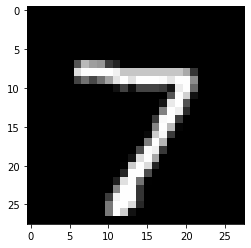

array([8.6568356e-08, 2.4432028e-08, 7.0958708e-06, 7.8884143e-05,
       4.9961184e-11, 4.9335165e-07, 5.1049707e-14, 9.9990225e-01,
       1.4257445e-07, 1.1082679e-05], dtype=float32)


<IPython.core.display.Javascript object>

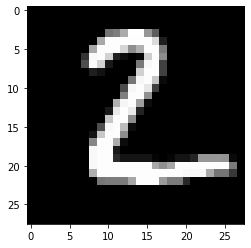

array([1.01358239e-07, 3.37623147e-04, 9.99651074e-01, 9.37890763e-06,
       2.21401165e-14, 4.42782579e-07, 8.32464142e-09, 1.28162776e-11,
       1.29213277e-06, 5.49987742e-14], dtype=float32)


<IPython.core.display.Javascript object>

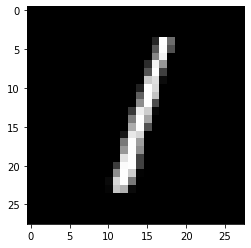

array([1.2062253e-07, 9.9880230e-01, 5.8346966e-05, 8.7651706e-06,
       1.1187179e-05, 3.0292372e-06, 3.2011146e-06, 1.0399017e-03,
       7.2994946e-05, 2.7495992e-07], dtype=float32)


In [31]:
from pprint import pprint
for i in range(0,3):
    print_image(x_test[i])
    pprint(out.numpy()[i])

# Tensorboard
Tool for providing the measurements and visualizations needed during the machine learning workflow. It enables tracking experiment metrics like loss and accuracy, visualizing the model graph, projecting embeddings to a lower dimensional space, and much more.  

https://www.tensorflow.org/tensorboard/get_started

In [32]:
%load_ext tensorboard
import datetime

In [33]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [34]:
model.fit(x_train, y_train, epochs=5, callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 1s 750us/step - loss: 0.0653 - accuracy: 0.9790
Epoch 2/5
1875/1875 [==============================] - 1s 718us/step - loss: 0.0568 - accuracy: 0.9817
Epoch 3/5
1875/1875 [==============================] - 1s 731us/step - loss: 0.0535 - accuracy: 0.9826
Epoch 4/5
1875/1875 [==============================] - 1s 716us/step - loss: 0.0491 - accuracy: 0.9841
Epoch 5/5
1875/1875 [==============================] - 1s 716us/step - loss: 0.0428 - accuracy: 0.9863


In [35]:
%tensorboard --logdir logs/fit

## How many layers and neurons?

In [36]:
from sklearn.exceptions import ConvergenceWarning
import warnings
import time

output = {}
output['time']=[]
output['loss']=[]
output['train_accuracy']=[]
output['test_accuracy']=[]

layer_experiments=[
    (5,),
    (50,),
    (128,),
    (50,50,),
    (128,128),
    (50,50,50,),
    (128,128,128,),
    ]

In [37]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    for i in range(0,len(layer_experiments)):
        print(f"Round {i+1} of {len(layer_experiments)}: {layer_experiments[i]}")
        mlp = MLPClassifier(hidden_layer_sizes=layer_experiments[i], max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)
        tic = time.perf_counter()
        mlp.fit(X_train, y_train)
        toc = time.perf_counter()
        output['time'].append(f"{toc - tic:0.4f}")
        output['loss'].append(mlp.loss_curve_)
        output['train_accuracy'].append(mlp.score(X_train, y_train))
        output['test_accuracy'].append(mlp.score(X_test, y_test))

Round 1 of 7: (5,)
Iteration 1, loss = 0.98048278
Iteration 2, loss = 0.79097252
Iteration 3, loss = 0.74072976
Iteration 4, loss = 0.70167581
Iteration 5, loss = 0.68090047
Iteration 6, loss = 0.66472898
Iteration 7, loss = 0.65537829
Iteration 8, loss = 0.64578418
Iteration 9, loss = 0.64237009
Iteration 10, loss = 0.63797582
Round 2 of 7: (50,)
Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355
Round 3 of 7: (128,)
Iteration 1, loss = 0.28744370
Iteration 2, loss = 0.11990822
Iteration 3, loss = 0.08360751
Iteration 4, loss = 0.06475769
Iteration 5, loss = 0.05299574
Iteration 6, loss = 0.04294585
Iteration 7, loss = 0.03563957
Iteration 8, loss = 0.02964551
Iteration 9, loss = 0.02393952
Iteration 10, loss = 0.02023260
Round 4

['9.4967', '10.9891', '14.1961', '13.2121', '18.4855', '21.7815', '27.7948']


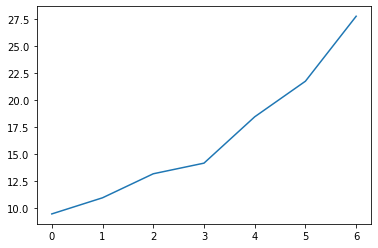

In [40]:
pprint(output['time'])

plt.plot(sorted([float(x) for x in output['time']]))

[0.9804827816166694, 0.7909725209092481, 0.7407297611043401, 0.7016758087516763, 0.6809004740615359, 0.6647289763570472, 0.6553782860527652, 0.6457841750558339, 0.6423700905505243, 0.6379758154261937]
[0.320099781583207, 0.153475340038357, 0.11544755277174389, 0.09279763538206452, 0.07889366742177356, 0.07170496894018964, 0.06282110928940321, 0.055307878371908724, 0.04960484259407232, 0.046453546641754835]
[0.28744370092487564, 0.11990822115290328, 0.083607514944863, 0.06475768889903513, 0.05299573808454009, 0.04294584522677833, 0.035639567548393335, 0.02964550898323996, 0.023939522030526673, 0.020232598068831324]
[0.31433495778160103, 0.13096525759747937, 0.09746443094258832, 0.08289663202607804, 0.06756178505119934, 0.06050956012768308, 0.054047344492746986, 0.04829665511044302, 0.04256342591973962, 0.04180813524200569]
[0.2763431584096857, 0.10165501543684366, 0.0702600947242054, 0.055334811841269586, 0.04194998113123063, 0.032190812358768674, 0.026116345305847007, 0.021043272363747

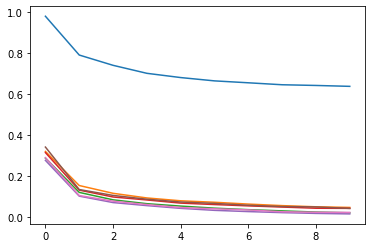

In [130]:
plt.figure()
for l in output['loss']:
    print(l) 
    plt.plot(l)
plt.show()

[0.8071833333333334,
 0.9868,
 0.9971166666666667,
 0.9885833333333334,
 0.9968666666666667,
 0.9900333333333333,
 0.99135]


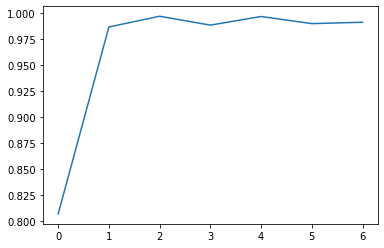

In [135]:
pprint(output['train_accuracy'])
plt.plot(output['train_accuracy'])

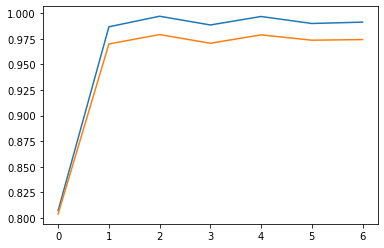

In [136]:
plt.figure()
plt.plot(output['train_accuracy'])
plt.plot(output['test_accuracy'])
plt.show()

## Tensorflow stock prediction
Based on https://www.thepythoncode.com/article/stock-price-prediction-in-python-using-tensorflow-2-and-keras

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from collections import deque

import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import tensorflow as tf
import yfinance as yf

from datetime import date
from pprint import pformat, pprint

In [16]:
# Setup globals and constants
ticker = "IBM"
LIMIT =500
sp500_file = 'constituents.bak.csv'
date_format = '%Y-%m-%d %H:%M:%S'
today = date.today().strftime(date_format)

sp500_list = []
sp500_history_dict = {}
sp500_history_df = {}

In [17]:
# Read in S&P500 list
if os.path.exists(sp500_file):
    with open(sp500_file, 'r') as f:
        sp500_reader = csv.reader(f)
        for i, row in enumerate(sp500_reader):
            if i != 0:
                sp500_list.append(row)
else:
    print(f"ERROR!!! Cannot find {sp500_file}")
    exit(-1)

pprint(sp500_list[:10])

[['MMM', '3M Company', 'Industrials'],
 ['AOS', 'A.O. Smith Corp', 'Industrials'],
 ['ABT', 'Abbott Laboratories', 'Health Care'],
 ['ABBV', 'AbbVie Inc.', 'Health Care'],
 ['ABMD', 'Abiomed', 'Health Care'],
 ['ACN', 'Accenture', 'Information Technology'],
 ['ATVI', 'Activision Blizzard', 'Communication Services'],
 ['ADBE', 'Adobe Inc.', 'Information Technology'],
 ['AAP', 'Advance Auto Parts', 'Consumer Discretionary'],
 ['AMD', 'Advanced Micro Devices', 'Information Technology']]


In [18]:
# Get data from yahoo for each symbol
for i, r in enumerate(sp500_list[:LIMIT]):
    symbol = r[0]
    sp500_history_dict[symbol] = yf.Ticker(symbol.replace(".","-")).history(period="max")
    sp500_history_dict[symbol].index = sp500_history_dict[symbol].index.strftime("%Y-%m-%d")
    sp500_history_dict[symbol] = sp500_history_dict[symbol].to_dict("index")
    rec = {"symbol":symbol, "data":sp500_history_dict[symbol]}
print(len(sp500_history_dict))

500


In [24]:
# For each returned dataset, turn it into a pandas dataframe
for symbol in sp500_list[:LIMIT]:
    symbol = symbol[0]
    df = pd.DataFrame.from_dict(sp500_history_dict[symbol], orient='index')
    df.reset_index(inplace=True)
    df = df.rename(columns = {'index':'Date'})
    df = df.set_index('Date')
    sp500_history_df[symbol] = df
# print head of last df for verification
sp500_history_df[symbol].head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-10-13,20.545844,21.219049,20.108699,21.201563,396800,0.0,0
2011-10-14,21.297740,22.285688,21.297740,22.163288,402600,0.0,0
2011-10-17,22.294429,22.556715,21.997169,21.997169,583400,0.0,0
2011-10-18,21.909734,22.172022,21.769847,22.067106,423500,0.0,0
2011-10-19,22.075854,22.163283,21.638708,21.638708,722200,0.0,0


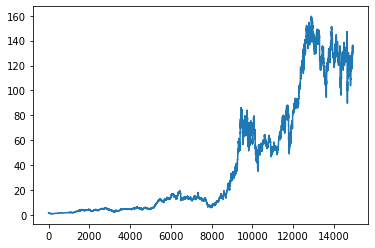

In [25]:
# Plot close values dor a single ticker
data = sp500_history_df[ticker].Close.values
plt.plot(data)

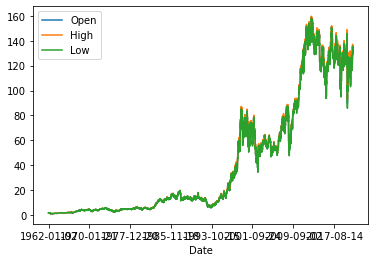

In [26]:
# plot various values from dataframe
sp500_history_df[ticker][["Open", "High", "Low"]].plot()
plt.show()

In [30]:
# set seed, so we can get the same results after rerunning several times
seed = 333
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

In [31]:
# helper function for training with shuffled data
def shuffle_in_unison(a, b):
    # shuffle two arrays in the same way
    state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(state)
    np.random.shuffle(b)

In [32]:
def load_data(ticker, n_steps=50, scale=True, shuffle=True, lookup_step=1, split_by_date=True,
                test_size=0.2, feature_columns=['Close', 'Volume', 'Open', 'High', 'Low']):
    """
    Loads data from Yahoo Finance source, as well as scaling, shuffling, normalizing and splitting.
    Params:
        ticker (str/pd.DataFrame): the ticker you want to load, examples include AAPL, TESL, etc.
        n_steps (int): the historical sequence length (i.e window size) used to predict, default is 50
        scale (bool): whether to scale prices from 0 to 1, default is True
        shuffle (bool): whether to shuffle the dataset (both training & testing), default is True
        lookup_step (int): the future lookup step to predict, default is 1 (e.g next day)
        split_by_date (bool): whether we split the dataset into training/testing by date, setting it 
            to False will split datasets in a random way
        test_size (float): ratio for test data, default is 0.2 (20% testing data)
        feature_columns (list): the list of features to use to feed into the model, default is everything grabbed from yahoo_fin
    """
    # see if ticker is already a loaded stock from yahoo finance
    if isinstance(ticker, str):
        # load it from yahoo_fin library
        df = si.get_data(ticker)
    elif isinstance(ticker, pd.DataFrame):
        # already loaded, use it directly
        df = ticker
    else:
        raise TypeError("ticker can be either a str or a `pd.DataFrame` instances")
    # this will contain all the elements we want to return from this function
    result = {}
    # we will also return the original dataframe itself
    result['df'] = df.copy()
    # make sure that the passed feature_columns exist in the dataframe
    for col in feature_columns:
        assert col in df.columns, f"'{col}' does not exist in the dataframe."
    # add date as a column
    if "date" not in df.columns:
        df["date"] = df.index
    if scale:
        column_scaler = {}
        # scale the data (prices) from 0 to 1
        for column in feature_columns:
            scaler = preprocessing.MinMaxScaler()
            df[column] = scaler.fit_transform(np.expand_dims(df[column].values, axis=1))
            column_scaler[column] = scaler
        # add the MinMaxScaler instances to the result returned
        result["column_scaler"] = column_scaler
    # add the target column (label) by shifting by `lookup_step`
    df['future'] = df['Close'].shift(-lookup_step)
    # last `lookup_step` columns contains NaN in future column
    # get them before droping NaNs
    last_sequence = np.array(df[feature_columns].tail(lookup_step))
    # drop NaNs
    df.dropna(inplace=True)
    sequence_data = []
    sequences = deque(maxlen=n_steps)
    for entry, target in zip(df[feature_columns + ["date"]].values, df['future'].values):
        sequences.append(entry)
        if len(sequences) == n_steps:
            sequence_data.append([np.array(sequences), target])
    # get the last sequence by appending the last `n_step` sequence with `lookup_step` sequence
    # for instance, if n_steps=50 and lookup_step=10, last_sequence should be of 60 (that is 50+10) length
    # this last_sequence will be used to predict future stock prices that are not available in the dataset
    last_sequence = list([s[:len(feature_columns)] for s in sequences]) + list(last_sequence)
    last_sequence = np.array(last_sequence).astype(np.float32)
    # add to result
    result['last_sequence'] = last_sequence
    # construct the X's and y's
    X, y = [], []
    for seq, target in sequence_data:
        X.append(seq)
        y.append(target)
    # convert to numpy arrays
    X = np.array(X)
    y = np.array(y)
    if split_by_date:
        # split the dataset into training & testing sets by date (not randomly splitting)
        train_samples = int((1 - test_size) * len(X))
        result["X_train"] = X[:train_samples]
        result["y_train"] = y[:train_samples]
        result["X_test"]  = X[train_samples:]
        result["y_test"]  = y[train_samples:]
        if shuffle:
            # shuffle the datasets for training (if shuffle parameter is set)
            shuffle_in_unison(result["X_train"], result["y_train"])
            shuffle_in_unison(result["X_test"], result["y_test"])
    else:    
        # split the dataset randomly
        result["X_train"], result["X_test"], result["y_train"], result["y_test"] = train_test_split(X, y, 
                                                                                test_size=test_size, shuffle=shuffle)
    # get the list of test set dates
    dates = result["X_test"][:, -1, -1]
    # retrieve test features from the original dataframe
    result["test_df"] = result["df"].loc[dates]
    # remove duplicated dates in the testing dataframe
    result["test_df"] = result["test_df"][~result["test_df"].index.duplicated(keep='first')]
    # remove dates from the training/testing sets & convert to float32
    result["X_train"] = result["X_train"][:, :, :len(feature_columns)].astype(np.float32)
    result["X_test"] = result["X_test"][:, :, :len(feature_columns)].astype(np.float32)
    return result

In [33]:
def create_model(sequence_length, n_features, units=256, cell=LSTM, n_layers=2, dropout=0.3,
                loss="mean_absolute_error", optimizer="rmsprop", bidirectional=False):
    model = Sequential()
    for i in range(n_layers):
        if i == 0:
            # first layer
            if bidirectional:
                model.add(Bidirectional(cell(units, return_sequences=True), batch_input_shape=(None, sequence_length, n_features)))
            else:
                model.add(cell(units, return_sequences=True, batch_input_shape=(None, sequence_length, n_features)))
        elif i == n_layers - 1:
            # last layer
            if bidirectional:
                model.add(Bidirectional(cell(units, return_sequences=False)))
            else:
                model.add(cell(units, return_sequences=False))
        else:
            # hidden layers
            if bidirectional:
                model.add(Bidirectional(cell(units, return_sequences=True)))
            else:
                model.add(cell(units, return_sequences=True))
        # add dropout after each layer
        model.add(Dropout(dropout))
    model.add(Dense(1, activation="linear"))
    model.compile(loss=loss, metrics=["mean_absolute_error"], optimizer=optimizer)
    return model

In [34]:
import os
import time
from tensorflow.keras.layers import LSTM

# Window size or the sequence length
N_STEPS = 100
# Lookup step, 1 is the next day
LOOKUP_STEP = 30
# whether to scale feature columns & output price as well
SCALE = True
scale_str = f"sc-{int(SCALE)}"
# whether to shuffle the dataset
SHUFFLE = False
shuffle_str = f"sh-{int(SHUFFLE)}"
# whether to split the training/testing set by date
SPLIT_BY_DATE = True
split_by_date_str = f"sbd-{int(SPLIT_BY_DATE)}"
# test ratio size, 0.2 is 20%
TEST_SIZE = 0.2
# features to use
FEATURE_COLUMNS = ['Close', 'Volume', 'Open', 'High', 'Low']
# date now
date_now = time.strftime("%Y-%m-%d")
### model parameters
N_LAYERS = 2
# LSTM cell
CELL = LSTM
# 256 LSTM neurons
UNITS = 256
# 40% dropout
DROPOUT = 0.4
# whether to use bidirectional RNNs
BIDIRECTIONAL = False
### training parameters
# mean absolute error loss
# LOSS = "mae"
# huber loss
LOSS = "huber_loss"
OPTIMIZER = "adam"
BATCH_SIZE = 64
EPOCHS = 10
ticker_data_filename = os.path.join("data", f"{ticker}_{date_now}.csv")
# model name to save, making it as unique as possible based on parameters
model_name = f"{date_now}_{ticker}-{shuffle_str}-{scale_str}-{split_by_date_str}-\
{LOSS}-{OPTIMIZER}-{CELL.__name__}-seq-{N_STEPS}-step-{LOOKUP_STEP}-layers-{N_LAYERS}-units-{UNITS}"
if BIDIRECTIONAL:
    model_name += "-b"

In [35]:
# create these folders if they does not exist
if not os.path.isdir("results"):
    os.mkdir("results")
if not os.path.isdir("logs"):
    os.mkdir("logs")
if not os.path.isdir("data"):
    os.mkdir("data")

In [36]:
data = load_data(sp500_history_df[ticker], N_STEPS, scale=SCALE, split_by_date=SPLIT_BY_DATE, 
                shuffle=SHUFFLE, lookup_step=LOOKUP_STEP, test_size=TEST_SIZE, 
                feature_columns=FEATURE_COLUMNS)
data

{'df':                   Open        High         Low       Close   Volume  \
 Date                                                                  
 1962-01-02    1.879359    1.879359    1.858243    1.858243   390000   
 1962-01-03    1.858241    1.874485    1.858241    1.874485   292500   
 1962-01-04    1.874484    1.874484    1.854992    1.855805   262500   
 1962-01-05    1.853368    1.853368    1.816008    1.819257   367500   
 1962-01-08    1.817635    1.817635    1.770529    1.785148   547500   
 ...                ...         ...         ...         ...      ...   
 2021-04-13  133.000000  133.619995  130.380005  131.179993  8033500   
 2021-04-14  131.309998  132.779999  130.520004  132.630005  5868000   
 2021-04-15  133.279999  133.869995  132.220001  132.580002  3884000   
 2021-04-16  133.000000  134.100006  132.949997  133.589996  5290900   
 2021-04-19  133.600006  133.800003  132.580002  133.050003  2506763   
 
             Dividends  Stock Splits  
 Date            

In [77]:
#!tensorboard --logdir="logs"

In [40]:
import matplotlib.pyplot as plt

def plot_graph(test_df):
    """
    This function plots true close price along with predicted close price
    with blue and red colors respectively
    """
    plt.plot(test_df[f'true_close_{LOOKUP_STEP}'], c='b')
    plt.plot(test_df[f'close_{LOOKUP_STEP}'], c='r')
    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.legend(["Actual Price", "Predicted Price"])
    plt.show()

In [41]:
def get_final_df(model, data):
    """
    This function takes the `model` and `data` dict to 
    construct a final dataframe that includes the features along 
    with true and predicted prices of the testing dataset
    """
    # if predicted future price is higher than the current, 
    # then calculate the true future price minus the current price, to get the buy profit
    buy_profit  = lambda current, true_future, pred_future: true_future - current if pred_future > current else 0
    # if the predicted future price is lower than the current price,
    # then subtract the true future price from the current price
    sell_profit = lambda current, true_future, pred_future: current - true_future if pred_future < current else 0
    X_test = data["X_test"]
    y_test = data["y_test"]
    # perform prediction and get prices
    y_pred = model.predict(X_test)
    if SCALE:
        y_test = np.squeeze(data["column_scaler"]["Close"].inverse_transform(np.expand_dims(y_test, axis=0)))
        y_pred = np.squeeze(data["column_scaler"]["Close"].inverse_transform(y_pred))
    test_df = data["test_df"]
    # add predicted future prices to the dataframe
    test_df[f"close_{LOOKUP_STEP}"] = y_pred
    # add true future prices to the dataframe
    test_df[f"true_close_{LOOKUP_STEP}"] = y_test
    # sort the dataframe by date
    test_df.sort_index(inplace=True)
    final_df = test_df
    # add the buy profit column
    final_df["buy_profit"] = list(map(buy_profit, 
                                    final_df["Close"], 
                                    final_df[f"close_{LOOKUP_STEP}"], 
                                    final_df[f"true_close_{LOOKUP_STEP}"])
                                    # since we don't have profit for last sequence, add 0's
                                    )
    # add the sell profit column
    final_df["sell_profit"] = list(map(sell_profit, 
                                    final_df["Close"], 
                                    final_df[f"close_{LOOKUP_STEP}"], 
                                    final_df[f"true_close_{LOOKUP_STEP}"])
                                    # since we don't have profit for last sequence, add 0's
                                    )
    return final_df

In [42]:
def predict(model, data):
    # retrieve the last sequence from data
    last_sequence = data["last_sequence"][-N_STEPS:]
    # expand dimension
    last_sequence = np.expand_dims(last_sequence, axis=0)
    # get the prediction (scaled from 0 to 1)
    prediction = model.predict(last_sequence)
    # get the price (by inverting the scaling)
    if SCALE:
        predicted_price = data["column_scaler"]["Close"].inverse_transform(prediction)[0][0]
    else:
        predicted_price = prediction[0][0]
    return predicted_price

In [43]:
# load optimal model weights from results folder
model_path = os.path.join("results", model_name) + ".h5"
model.load_weights(model_path)

In [44]:
# evaluate the model
loss, mae = model.evaluate(data["X_test"], data["y_test"], verbose=0)
# calculate the mean absolute error (inverse scaling)
if SCALE:
    mean_absolute_error = data["column_scaler"]["Close"].inverse_transform([[mae]])[0][0]
else:
    mean_absolute_error = mae

In [45]:
# get the final dataframe for the testing set
final_df = get_final_df(model, data)
final_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,close_30,true_close_30,buy_profit,sell_profit
Date,,,,,,,,,,,
2009-06-03,73.744678,73.793135,72.761694,73.716988,7688000,0.0,0.0,71.155365,76.589813,-2.561623,0.0
2009-06-04,73.495478,73.980051,73.100899,73.606239,5468500,0.0,0.0,71.362228,79.898735,-2.244011,0.0
2009-06-05,74.298495,75.039196,73.896993,74.236191,7665000,0.0,0.0,71.585022,80.604813,-2.651169,0.0
2009-06-08,73.820812,74.748421,73.031655,74.409218,6363800,0.0,0.0,71.758789,81.020172,-2.650429,0.0
2009-06-09,74.866123,75.551443,74.755362,74.859200,8585900,0.0,0.0,71.981102,80.002571,-2.878098,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-01,120.349998,122.320000,119.860001,120.739998,5714500,0.0,0.0,108.779579,131.179993,-11.960419,0.0
2021-03-02,120.739998,121.900002,120.260002,120.330002,4522200,0.0,0.0,108.784050,132.630005,-11.545952,0.0
2021-03-03,120.500000,122.629997,119.980003,122.360001,7396200,0.0,0.0,108.821167,132.580002,-13.538834,0.0


In [46]:
# predict the future price
future_price = predict(model, data)
future_price

117.23396

In [47]:
# we calculate the accuracy by counting the number of positive profits
accuracy_score = (len(final_df[final_df['sell_profit'] > 0]) + len(final_df[final_df['buy_profit'] > 0])) / len(final_df)
# calculating total buy & sell profit
total_buy_profit  = final_df["buy_profit"].sum()
total_sell_profit = final_df["sell_profit"].sum()
# total profit by adding sell & buy together
total_profit = total_buy_profit + total_sell_profit
# dividing total profit by number of testing samples (number of trades)
profit_per_trade = total_profit / len(final_df)

In [48]:
# printing metrics
print(f"Future price after {LOOKUP_STEP} days is {future_price:.2f}$")
print(f"{LOSS} loss:", loss)
print("Mean Absolute Error:", mean_absolute_error)
print("Accuracy score:", accuracy_score)
print("Total buy profit:", total_buy_profit)
print("Total sell profit:", total_sell_profit)
print("Total profit:", total_profit)
print("Profit per trade:", profit_per_trade)

Future price after 30 days is 117.23$
huber_loss loss: 0.005462737346533686
Mean Absolute Error: 15.826653102805235
Accuracy score: 0.43614864864864866
Total buy profit: -20687.316413879395
Total sell profit: 19986.701454162598
Total profit: -700.6149597167969
Profit per trade: -0.2366942431475665


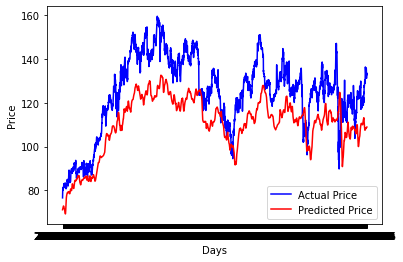

In [49]:
plot_graph(final_df)